# Problem 1 - Return Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## a)

In [10]:
data = pd.read_csv('PS1 - Data.csv', index_col = 0)
# Discrete Monthly Returns
for column in data.columns:
    data[column] = data[column].pct_change(periods = 1)
discrete_returns = data.iloc[1:,:]
print(discrete_returns.head(n = 5))

            DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW     BAYER  \
1996-08-23       0.005421  0.035851  0.085921  0.023022  0.018961  0.062685   
1996-09-23      -0.029687 -0.004419  0.082109  0.003933  0.011622  0.038204   
1996-10-23      -0.004588  0.029361  0.029044  0.011900  0.033911  0.042568   
1996-11-23      -0.003359  0.007230  0.085472 -0.104982  0.039467  0.019031   
1996-12-23       0.000293 -0.003587  0.113851 -0.001529  0.128339  0.032261   

                E_ON       RWE    HENKEL       SAP  
1996-08-23  0.027119  0.030107  0.015875  0.106914  
1996-09-23  0.015450  0.031968  0.015520  0.063693  
1996-10-23  0.057710  0.146010  0.027635 -0.176907  
1996-11-23  0.035129  0.027803  0.126821 -0.048978  
1996-12-23  0.023631 -0.012378 -0.026487  0.075002  


In [11]:
log_returns = np.log(1 + discrete_returns)
print(log_returns.head(n = 5))

            DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS       BMW     BAYER  \
1996-08-23       0.005407  0.035223  0.082428  0.022761  0.018784  0.060798   
1996-09-23      -0.030137 -0.004429  0.078912  0.003925  0.011555  0.037492   
1996-10-23      -0.004598  0.028938  0.028630  0.011830  0.033349  0.041687   
1996-11-23      -0.003365  0.007204  0.082015 -0.110911  0.038708  0.018853   
1996-12-23       0.000293 -0.003594  0.107823 -0.001530  0.120747  0.031752   

                E_ON       RWE    HENKEL       SAP  
1996-08-23  0.026758  0.029662  0.015750  0.101576  
1996-09-23  0.015332  0.031467  0.015401  0.061747  
1996-10-23  0.056106  0.136286  0.027260 -0.194687  
1996-11-23  0.034526  0.027424  0.119400 -0.050218  
1996-12-23  0.023356 -0.012455 -0.026844  0.072323  


In [12]:
mean_discrete_returns = discrete_returns.mean()
print(mean_discrete_returns)

DEUTSCHE_BANK    0.005781
ALLIANZ          0.009765
BASF             0.012841
SIEMENS          0.012938
BMW              0.012715
BAYER            0.008714
E_ON             0.006305
RWE              0.007659
HENKEL           0.010174
SAP              0.014813
dtype: float64


In [14]:
mean_log_returns = log_returns.mean()
print(mean_log_returns)

DEUTSCHE_BANK   -0.001734
ALLIANZ          0.004535
BASF             0.009312
SIEMENS          0.007988
BMW              0.008206
BAYER            0.004945
E_ON             0.003171
RWE              0.003527
HENKEL           0.008016
SAP              0.009443
dtype: float64


In [15]:
std_discrete_returns = discrete_returns.std()
print(std_discrete_returns)

DEUTSCHE_BANK    0.123125
ALLIANZ          0.101044
BASF             0.081873
SIEMENS          0.097924
BMW              0.093502
BAYER            0.085710
E_ON             0.077994
RWE              0.089498
HENKEL           0.064351
SAP              0.101566
dtype: float64


In [16]:
std_log_returns = log_returns.std()
print(std_log_returns)

DEUTSCHE_BANK    0.123725
ALLIANZ          0.103587
BASF             0.084579
SIEMENS          0.100254
BMW              0.095559
BAYER            0.087519
E_ON             0.079970
RWE              0.091935
HENKEL           0.065799
SAP              0.104463
dtype: float64


In [17]:
mean_discrete_returns_ann = mean_discrete_returns * 12
print(mean_discrete_returns_ann)

DEUTSCHE_BANK    0.069372
ALLIANZ          0.117179
BASF             0.154088
SIEMENS          0.155251
BMW              0.152583
BAYER            0.104574
E_ON             0.075657
RWE              0.091904
HENKEL           0.122083
SAP              0.177752
dtype: float64


In [18]:
mean_log_returns_ann = mean_log_returns * 12
print(mean_log_returns_ann)

DEUTSCHE_BANK   -0.020805
ALLIANZ          0.054416
BASF             0.111738
SIEMENS          0.095857
BMW              0.098470
BAYER            0.059340
E_ON             0.038057
RWE              0.042329
HENKEL           0.096194
SAP              0.113320
dtype: float64


## b)

In [55]:
stocks = data.columns
differences = pd.DataFrame(columns = stocks)
max_differences =  pd.DataFrame(columns = stocks, index = ['max_diff'])
for stock in stocks:
    diff = np.abs(discrete_returns[stock] - log_returns[stock])
    max_diff = diff.max()
    max_differences.loc['max_diff', stock] = max_diff
print(max_differences)
print('\nLargest max discrete-log difference:', max_differences.loc['max_diff',:].max(), '(DEUTSCHE_BANK)')
print('\nSmallest max discrete-log difference:', max_differences.loc['max_diff',:].min(), '(E_ON)')

         DEUTSCHE_BANK   ALLIANZ      BASF   SIEMENS      BMW     BAYER  \
max_diff      0.225127  0.133743  0.076351  0.092679  0.09344  0.080488   

              E_ON       RWE   HENKEL      SAP  
max_diff  0.054059  0.096935  0.07233  0.10342  

Largest max discrete-log difference: 0.22512696771345952 (DEUTSCHE_BANK)

Smallest max discrete-log difference: 0.05405919751851518 (E_ON)


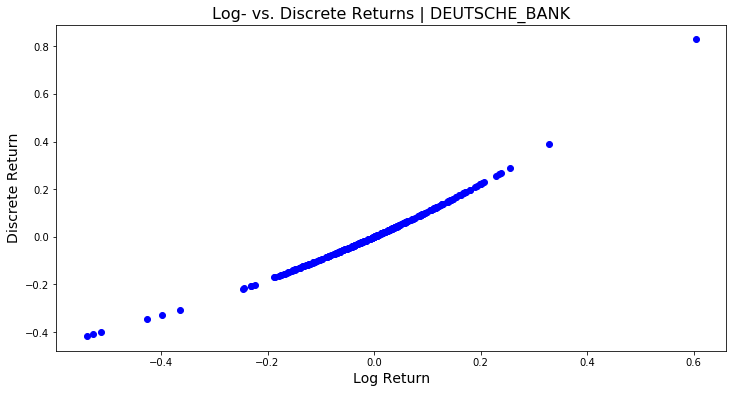

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [89]:
plt.figure(figsize = (12,6))
plt.plot(log_returns['DEUTSCHE_BANK'], discrete_returns['DEUTSCHE_BANK'], linestyle = "None", marker = 'o', color = 'blue')
plt.title('Log- vs. Discrete Returns | DEUTSCHE_BANK', size = 16)
plt.xlabel('Log Return', size = 14)
plt.ylabel('Discrete Return', size = 14)
plt.show()
plt.save('DB_Plot')

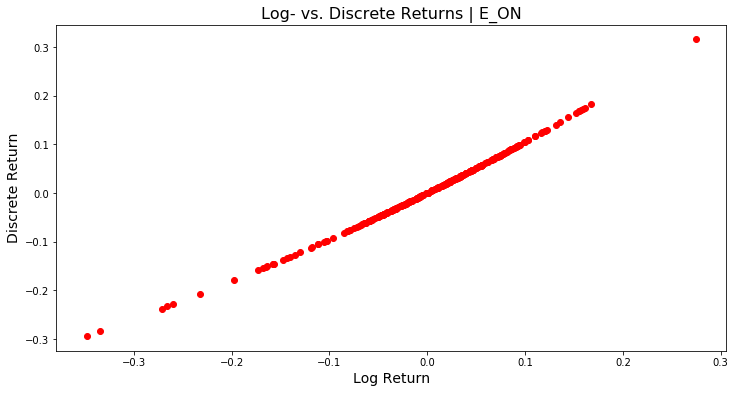

In [59]:
plt.figure(figsize = (12,6))
plt.plot(log_returns['E_ON'], discrete_returns['E_ON'], linestyle = "None", marker = 'o', color = 'red')
plt.title('Log- vs. Discrete Returns | E_ON', size = 16)
plt.xlabel('Log Return', size = 14)
plt.ylabel('Discrete Return', size = 14)
plt.show()

## c)

seen in the solution sheet

## d)

In [84]:
stocks = data.columns
weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

for stock, weight, i in zip(stocks, weights, range(0, len(stocks))):
    weighted_stock_returns = (discrete_returns[stock] * weight).to_numpy()
    if i == 0:
        portfolio_returns = weighted_stock_returns
    else:
        portfolio_returns = np.add(portfolio_returns, weighted_stock_returns)
portfolio_returns = pd.DataFrame(portfolio_returns, index = data.index[1:], columns = ['portfolio_return'])
print(portfolio_returns)                          

            portfolio_return
1996-08-23          0.041188
1996-09-23          0.022839
1996-10-23          0.019664
1996-11-23          0.018364
1996-12-23          0.032940
...                      ...
2021-03-23          0.063548
2021-04-23          0.039714
2021-05-23          0.031182
2021-06-23         -0.031495
2021-07-23         -0.001809

[300 rows x 1 columns]


In [88]:
investment = 100
for i in portfolio_returns.index:
    investment = investment * (1 + portfolio_returns.loc[i, 'portfolio_return'])
print('\n Value of investment in July 2021:', round(investment, 2), 'EUR')


 Value of investment in July 2021: 980.76 EUR
